In [1]:
import sys
sys.path.append('../src')

In [2]:
import numpy as np
from structure_learning.samplers import StructureMCMC
from structure_learning.data import SyntheticDataset, Data
from structure_learning.distributions import Distribution, OPAD
from structure_learning.data_structures import DAG
from structure_learning.scores import BGeScore, BDeuScore
from structure_learning.evaluation.metrics import KLD, JSD, MAE, MSE, SHD
# for reproducibility
np.random.seed(100)

In [3]:
# setup synthetic data
num_nodes = 5
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

00010 00100 10000 00000 01010


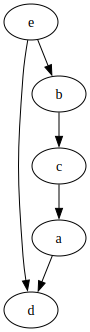

In [4]:
# visualise ground truth DAG
synthetic_data.graph.plot()

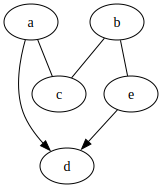

In [5]:
synthetic_data.graph.to_cpdag().plot()

In [6]:
# setup mcmc
n_iterations = 100000
print(synthetic_data.data, synthetic_data.data.values)
M = StructureMCMC(data=synthetic_data.data, score_object='bge', max_iter=n_iterations, pc_init=True, result_type='distribution', seed=100, burn_in=0.1)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'a': 'N', 'b': 'N', 'c': 'N', 'd': 'N', 'e': 'N'}


<structure_learning.data.data.Data object at 0x347902ae0>             a         b         c          d         e
0   -0.196445 -0.039365  0.005593  -0.453780 -0.453966
1    0.928469  0.584385 -0.133857   1.102345 -0.030515
2   -0.195909 -1.806724 -1.310008   0.987758 -0.783253
3    3.672439 -1.553858 -2.504501   5.624512 -1.207085
4    2.118560 -1.030663 -0.707275   2.436619  0.005117
..        ...       ...       ...        ...       ...
195 -3.726553  1.021710  2.485784  -5.164662  1.223314
196  8.735060 -2.204730 -4.911152  11.896884 -1.547577
197 -8.914967  2.234533  5.129776  -7.948369  1.181551
198  2.846533 -1.604027 -1.664003   3.002756 -0.592358
199  2.255836 -0.702683 -1.311533   3.316782 -0.928191

[200 rows x 5 columns]
Running PC algorithm


  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
# run experiment
mcmc_results, acceptance = M.run()

MCMC iterations: 100001iter [00:15, 6638.92iter/s]                         


In [8]:
mcmc_results.particles[list(mcmc_results.particles.keys())[0]]

{'iteration': [10000,
  10024,
  10025,
  10026,
  10031,
  10032,
  10033,
  10034,
  10035,
  10036,
  10037,
  10038,
  10039,
  10242,
  10243,
  10244,
  10346,
  10347,
  10348,
  10349,
  10350,
  10351,
  10352,
  10353,
  10354,
  10355,
  10356,
  10667,
  10668,
  10669,
  10670,
  10705,
  10706,
  11224,
  11225,
  11284,
  11285,
  11286,
  11287,
  11338,
  11414,
  11415,
  11416,
  11417,
  11418,
  11456,
  11457,
  11458,
  11459,
  11460,
  11461,
  11462,
  11668,
  11669,
  11670,
  11671,
  11672,
  11673,
  11674,
  11675,
  11676,
  11677,
  11678,
  11679,
  11680,
  11681,
  11682,
  11683,
  11684,
  11685,
  11686,
  11755,
  11756,
  11757,
  11758,
  11759,
  11760,
  11761,
  11804,
  11805,
  11806,
  11807,
  11808,
  11809,
  11810,
  11811,
  11812,
  11813,
  11814,
  11815,
  11816,
  11973,
  11974,
  12008,
  12090,
  12091,
  12092,
  12093,
  12094,
  12095,
  12096,
  12097,
  12109,
  12300,
  12729,
  12730,
  12731,
  12732,
  12736,
  1273

In [9]:

print('Acceptance_ratio:', acceptance)

Acceptance_ratio: 0.18033


/Users/165421/Documents/code/structure_learning/examples/../src/structure_learning/distributions/distribution.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(particles[-limit:], rotation=90)


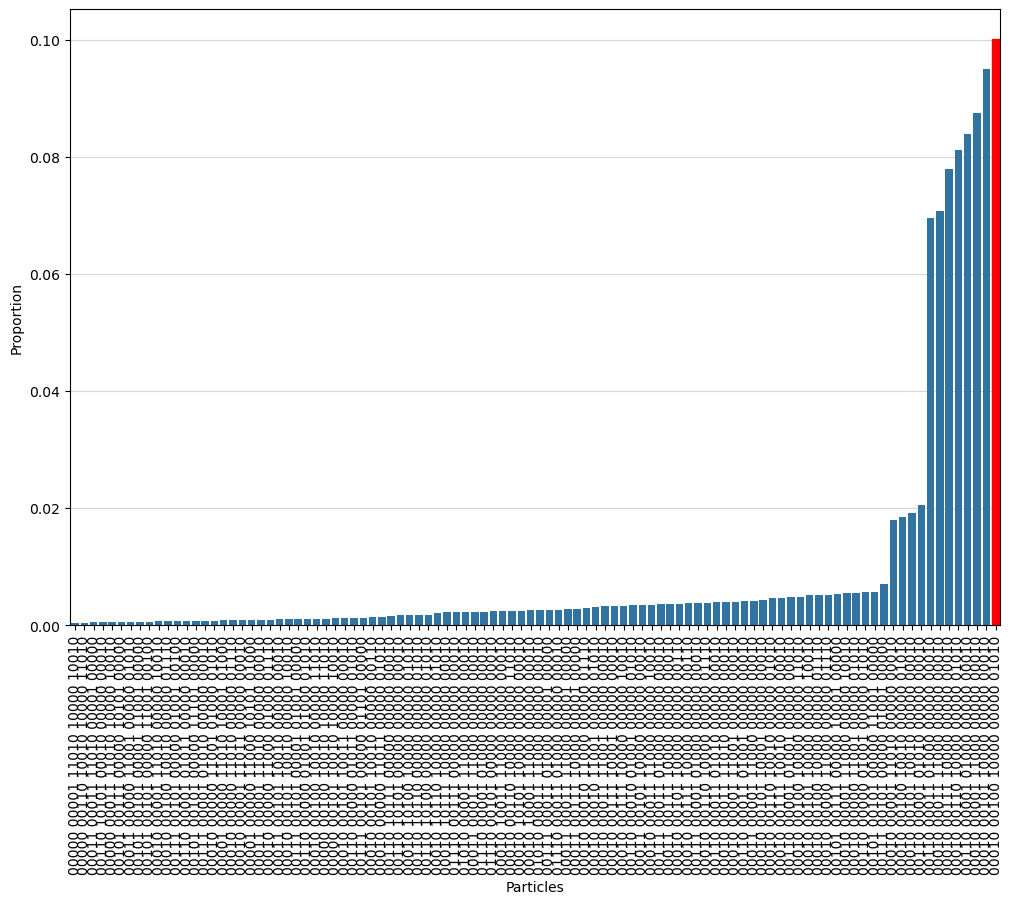

In [10]:
from matplotlib import pyplot as plt

key = synthetic_data.graph.to_key()
plt.rcParams['figure.figsize'] = 12,8
bars, keys, counts = mcmc_results.plot(sort=True, normalise=True, limit=100)
bars.containers[0][np.where(np.array(keys)==key)[0][0]].set_color('red')

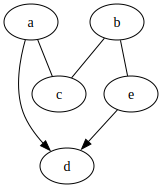

In [11]:
DAG.from_key(key=mcmc_results.top(n=1).item(), nodes=node_labels).to_cpdag().plot()

In [12]:
true_dist = Distribution.compute_distribution(synthetic_data.data, score=BGeScore)

/Users/165421/Documents/code/structure_learning/examples/../src/structure_learning/distributions/distribution.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(particles[-limit:], rotation=90)


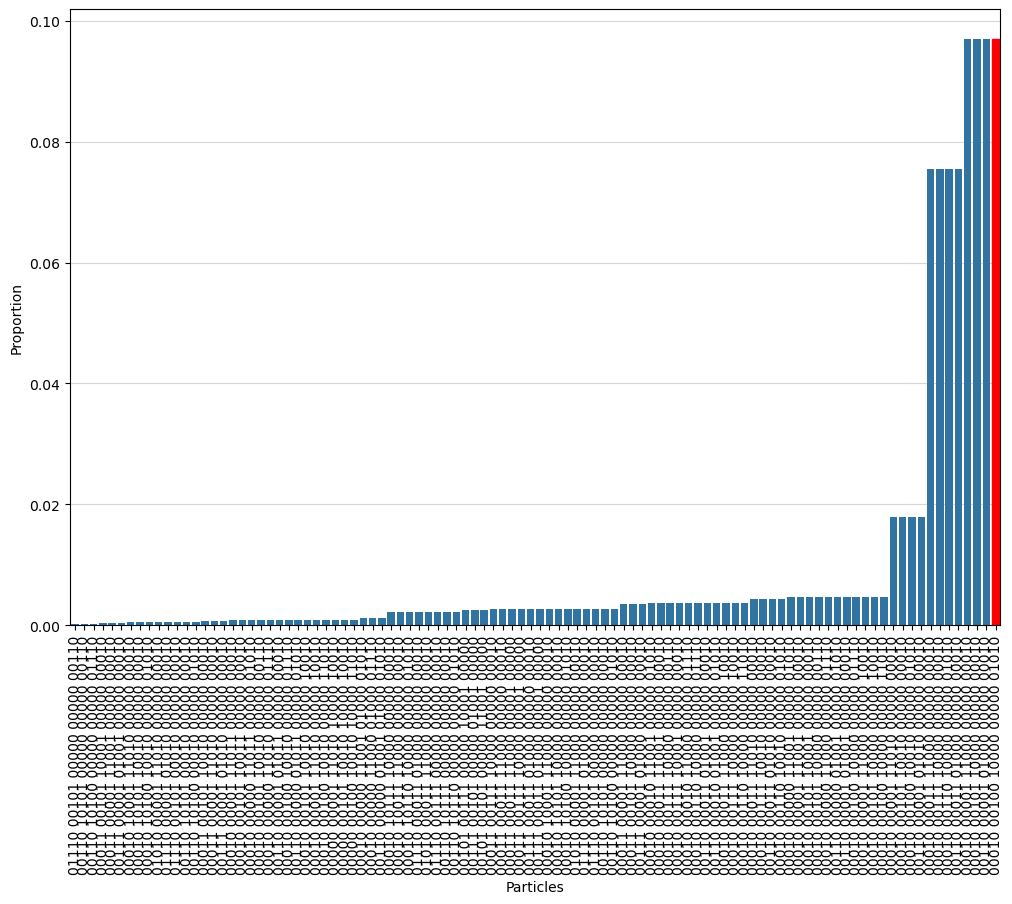

In [13]:

bars2, keys, counts = true_dist.plot(prop='p', sort=True, limit=100)
bars2.containers[0][np.where(np.array(keys)==key)[0][0]].set_color('red')

In [14]:
opad_results = mcmc_results.to_opad()
opad_plus_results = mcmc_results.to_opad(plus=True)

Adding rejected particles


### KLD

In [15]:
kld = KLD()
kld_mcmc = kld.compute(mcmc_results, true_dist)
kld_opad = kld.compute(opad_results, true_dist)
kld_opad_plus = kld.compute(opad_plus_results, true_dist)

print(kld_mcmc, kld_opad, kld_opad_plus)

0.03885778767676278 0.0043101057976615625 0.002220724770364824


### JSD

In [16]:
jsd = JSD()
jsd_mcmc = jsd.compute(mcmc_results, true_dist)
jsd_opad = jsd.compute(opad_results, true_dist)
jsd_opad_plus = jsd.compute(opad_plus_results, true_dist)

print(jsd_mcmc, jsd_opad, jsd_opad_plus)

0.008442068142782387 0.0014927623935778826 0.0007693374187683355


### MSE

In [17]:
mse = MSE()
mse_mcmc = mse.compute(mcmc_results, true_dist)
mse_opad = mse.compute(opad_results, true_dist)
mse_opad_plus = mse.compute(opad_plus_results, true_dist)

print(mse_mcmc, mse_opad, mse_opad_plus)

1.5299671262267714e-08 4.7454004517194206e-11 1.4769651144250476e-11


### MAE

In [18]:
mae = MAE()
mae_mcmc = mae.compute(mcmc_results, true_dist)
mae_opad = mae.compute(opad_results, true_dist)
mae_opad_plus = mae.compute(opad_plus_results, true_dist)

print(mae_mcmc, mae_opad, mae_opad_plus)

4.25829069786672e-06 2.938006767778385e-07 1.5153882529367722e-07


### SHD

In [19]:
shd = SHD()
shd_mcmc = shd.compute(mcmc_results, synthetic_data.graph)
shd_opad = shd.compute(opad_results, synthetic_data.graph)
shd_opad_plus = shd.compute(opad_plus_results, synthetic_data.graph)

print(shd_mcmc, shd_opad, shd_opad_plus)

0.00590914305528946 0.005743998583752561 0.001168459832124134


In [20]:
M.save('smcmc.pkl.gzip')

In [21]:
from structure_learning.samplers import MCMC
M2 = MCMC.load('smcmc.pkl.gzip')